<a href="https://colab.research.google.com/github/minhcong00/AI/blob/main/Nhan_Dang_Tien_VND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array
folder = 'drive/MyDrive/Money/Money_train/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('5k'):
    output = 0.0
  if file.startswith('10k'):
    output = 1.0
  if file.startswith('20k'):
    output = 2.0
  if file.startswith('50k'):
    output = 3.0
  if file.startswith('100k'):
    output = 4.0
  if file.startswith('200k'):
    output = 5.0
  if file.startswith('500k'):
    output = 6.0

  photo = load_img(folder + file, target_size =(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape, labels_train.shape)

(387, 200, 200, 3) (387,)


In [7]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/Money/Money_test/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('5k'):
    output = 0.0
  if file.startswith('10k'):
    output = 1.0
  if file.startswith('20k'):
    output = 2.0
  if file.startswith('50k'):
    output = 3.0
  if file.startswith('100k'):
    output = 4.0
  if file.startswith('200k'):
    output = 5.0
  if file.startswith('500k'):
    output = 6.0

  photo = load_img(folder + file, target_size =(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape, labels_test.shape)

(182, 200, 200, 3) (182,)


In [8]:
from keras.utils import  to_categorical

photos_train = photos_train.reshape(387, 200, 200, 3)
photos_train = photos_train.astype('float32')/255 
photos_test = photos_test.reshape(182, 200, 200, 3)
photos_test = photos_test.astype('float32')/255

labels_train = to_categorical(labels_train,7)
labels_test = to_categorical(labels_test,7)

print(photos_train.shape, labels_train.shape, photos_test.shape, labels_test.shape)

(387, 200, 200, 3) (387, 7) (182, 200, 200, 3) (182, 7)


In [9]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU
batch_size = 64
epochs = 30
classes = 7

model = Sequential()
#CNN
#tich chap 32 lan
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',input_shape = (200,200,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tich chap 64 lan
model.add(Conv2D(64, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tich chap 128 lan
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#ANN
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation ='softmax'))
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

In [10]:
#compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy',metrics = ['accuracy'])
train = model.fit(photos_train, labels_train, batch_size = batch_size ,epochs = epochs, verbose = 1)
test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('Do chinh xac', test_acc)
print('Do mat mat', test_loss)

Epoch 1/30
7/7 [==============================] - 12s 133ms/step - loss: 2.1539 - accuracy: 0.2817
Epoch 2/30
7/7 [==============================] - 1s 83ms/step - loss: 0.9750 - accuracy: 0.6357
Epoch 3/30
7/7 [==============================] - 1s 84ms/step - loss: 0.6464 - accuracy: 0.7855
Epoch 4/30
7/7 [==============================] - 1s 84ms/step - loss: 0.2743 - accuracy: 0.9199
Epoch 5/30
7/7 [==============================] - 1s 82ms/step - loss: 0.1690 - accuracy: 0.9432
Epoch 6/30
7/7 [==============================] - 1s 81ms/step - loss: 0.0837 - accuracy: 0.9690
Epoch 7/30
7/7 [==============================] - 1s 80ms/step - loss: 0.0677 - accuracy: 0.9793
Epoch 8/30
7/7 [==============================] - 1s 80ms/step - loss: 0.0923 - accuracy: 0.9690
Epoch 9/30
7/7 [==============================] - 1s 80ms/step - loss: 0.0877 - accuracy: 0.9845
Epoch 10/30
7/7 [==============================] - 1s 80ms/step - loss: 0.0399 - accuracy: 0.9922
Epoch 11/30
7/7 [==========

In [11]:
model.save('drive/MyDrive/Money/modelNhandangTien.h5')

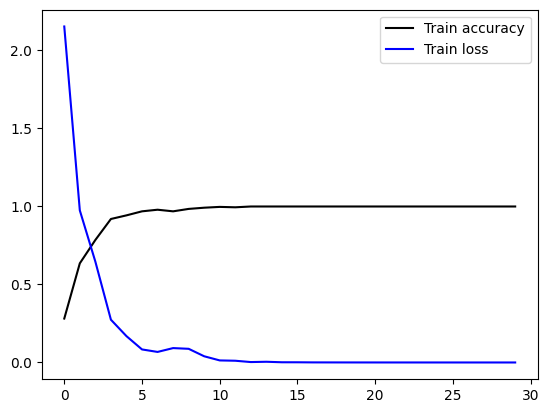

In [12]:
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'b', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

1/1 [==============================] - 0s 20ms/step
Giá trị: 0
1/1 [==============================] - 0s 17ms/step
5k
1/1 [==============================] - 0s 41ms/step


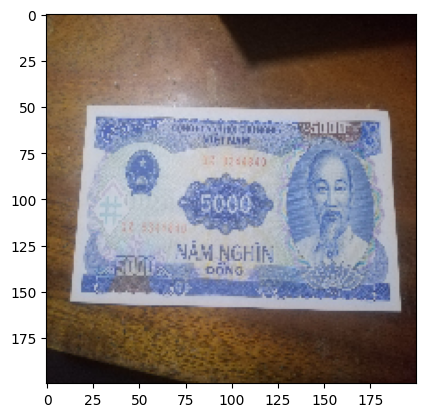

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/Money/5k.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('5k')
if np.argmax(model.predict(img)) == 1:
   print('10k')
if np.argmax(model.predict(img)) == 2:
   print('20k')
if np.argmax(model.predict(img)) == 3:
   print('50k')
if np.argmax(model.predict(img)) == 4:
   print('100k')
if np.argmax(model.predict(img)) == 5:
   print('200k')
if np.argmax(model.predict(img)) == 6:
   print('500k')

1/1 [==============================] - 0s 20ms/step
Giá trị: 1
1/1 [==============================] - 0s 20ms/step
10k
1/1 [==============================] - 0s 19ms/step


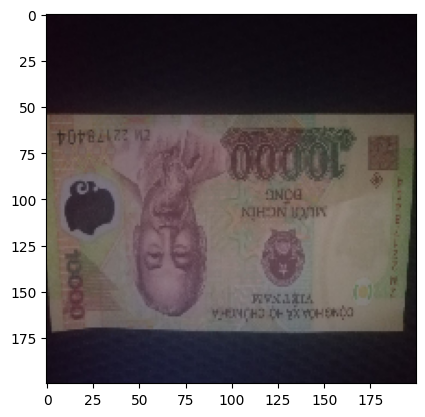

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/Money/10k.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('5k')
if np.argmax(model.predict(img)) == 1:
   print('10k')
if np.argmax(model.predict(img)) == 2:
   print('20k')
if np.argmax(model.predict(img)) == 3:
   print('50k')
if np.argmax(model.predict(img)) == 4:
   print('100k')
if np.argmax(model.predict(img)) == 5:
   print('200k')
if np.argmax(model.predict(img)) == 6:
   print('500k')

1/1 [==============================] - 0s 35ms/step
Giá trị: 2
1/1 [==============================] - 0s 39ms/step
20k
1/1 [==============================] - 0s 29ms/step


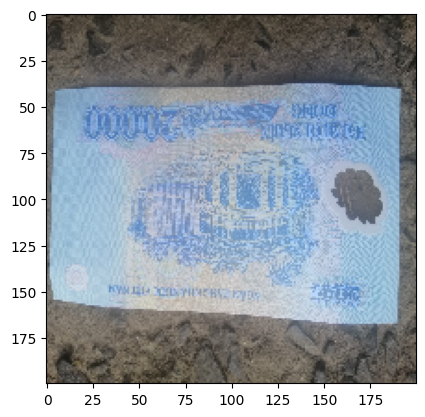

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/Money/20k.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('5k')
if np.argmax(model.predict(img)) == 1:
   print('10k')
if np.argmax(model.predict(img)) == 2:
   print('20k')
if np.argmax(model.predict(img)) == 3:
   print('50k')
if np.argmax(model.predict(img)) == 4:
   print('100k')
if np.argmax(model.predict(img)) == 5:
   print('200k')
if np.argmax(model.predict(img)) == 6:
   print('500k')

1/1 [==============================] - 0s 19ms/step
Giá trị: 3
1/1 [==============================] - 0s 19ms/step
50k
1/1 [==============================] - 0s 18ms/step


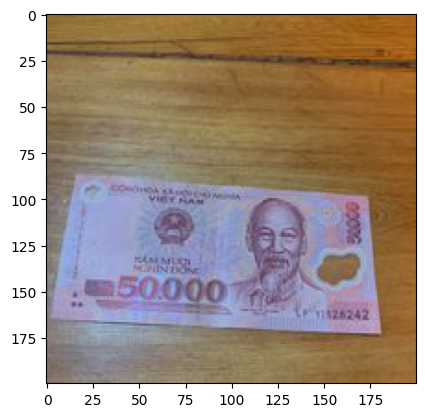

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/Money/50k.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('5k')
if np.argmax(model.predict(img)) == 1:
   print('10k')
if np.argmax(model.predict(img)) == 2:
   print('20k')
if np.argmax(model.predict(img)) == 3:
   print('50k')
if np.argmax(model.predict(img)) == 4:
   print('100k')
if np.argmax(model.predict(img)) == 5:
   print('200k')
if np.argmax(model.predict(img)) == 6:
   print('500k')

1/1 [==============================] - 0s 21ms/step
Giá trị: 4
1/1 [==============================] - 0s 18ms/step
100k
1/1 [==============================] - 0s 21ms/step


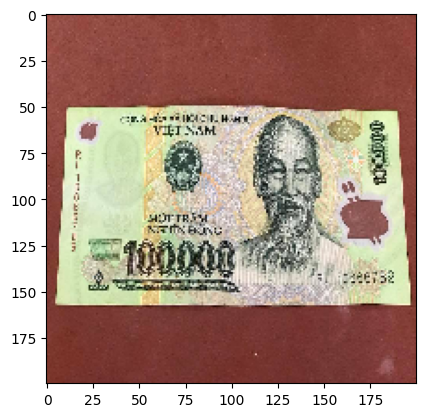

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/Money/100k.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('5k')
if np.argmax(model.predict(img)) == 1:
   print('10k')
if np.argmax(model.predict(img)) == 2:
   print('20k')
if np.argmax(model.predict(img)) == 3:
   print('50k')
if np.argmax(model.predict(img)) == 4:
   print('100k')
if np.argmax(model.predict(img)) == 5:
   print('200k')
if np.argmax(model.predict(img)) == 6:
   print('500k')

1/1 [==============================] - 0s 18ms/step
Giá trị: 5
1/1 [==============================] - 0s 37ms/step
200k
1/1 [==============================] - 0s 66ms/step


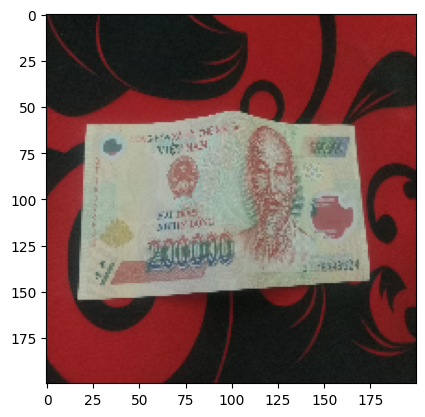

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/Money/200k.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('5k')
if np.argmax(model.predict(img)) == 1:
   print('10k')
if np.argmax(model.predict(img)) == 2:
   print('20k')
if np.argmax(model.predict(img)) == 3:
   print('50k')
if np.argmax(model.predict(img)) == 4:
   print('100k')
if np.argmax(model.predict(img)) == 5:
   print('200k')
if np.argmax(model.predict(img)) == 6:
   print('500k')

1/1 [==============================] - 0s 18ms/step
Giá trị: 6
1/1 [==============================] - 0s 19ms/step
500k


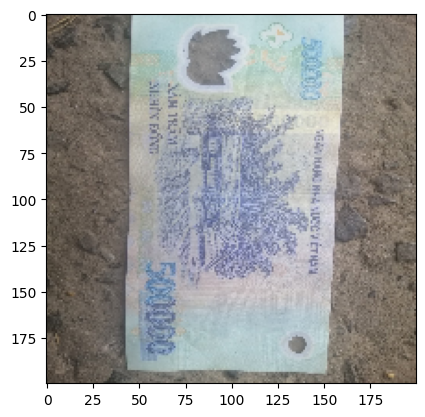

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/Money/500k.jpg', target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('5k')
if np.argmax(model.predict(img)) == 1:
   print('10k')
if np.argmax(model.predict(img)) == 2:
   print('20k')
if np.argmax(model.predict(img)) == 3:
   print('50k')
if np.argmax(model.predict(img)) == 4:
   print('100k')
if np.argmax(model.predict(img)) == 5:
   print('200k')
if np.argmax(model.predict(img)) == 6:
   print('500k')